# Life expectancy project from Codecademy

This is a notebook for the life expectancy project of the Codecademy Data Science Machine Learning career path.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load the data
df = pd.read_csv('all_data.csv')

In [3]:
# begin with the EDA
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.info

<bound method DataFrame.info of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

In [20]:
df.columns = ['Country', 'Year', 'Life_expectancy', 'GDP']
df.columns

Index(['Country', 'Year', 'Life_expectancy', 'GDP'], dtype='object')

In [5]:
df.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [6]:
df2 = df.groupby(['Country'])['Life expectancy at birth (years)'].mean()
df2.head(15)

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Life_expectancy'>

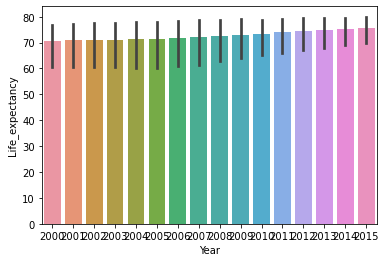

In [21]:
import seaborn as sns
sns.barplot(x="Year", y="Life_expectancy", data=df)

## Life expectancy evolution in each country

In [42]:
# calculate the evolution of life expectancy in each country
countries = df['Country'].unique()

life_expectancy_evolution = np.zeros((len(countries), 16))
for i in range(len(countries)):
    for j in range(16):
        life_expectancy_evolution[i, j] = df[(df['Country'] == countries[i]) & (df['Year'] == 2000 + j)].iloc[0]['Life_expectancy'] 
print(life_expectancy_evolution)

[[77.3 77.3 77.8 77.9 78.  78.4 78.9 78.9 79.6 79.3 79.1 79.8 79.9 80.1
  80.3 80.5]
 [71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
  75.8 76.1]
 [78.  78.3 78.4 78.5 79.1 79.2 79.6 79.8 79.9 80.  80.1 80.5 80.6 80.6
  80.9 81. ]
 [74.8 75.  75.  75.  75.4 75.3 75.8 76.  75.6 75.7 75.6 76.1 76.3 76.6
  76.6 76.7]
 [76.8 76.9 77.  77.2 77.5 77.5 77.8 78.1 78.2 78.5 78.7 78.7 78.8 78.9
  79.1 79.3]
 [46.  45.3 44.8 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.
  59.2 60.7]]


Text(0, 0.5, 'Life expectancy at birth (years)')

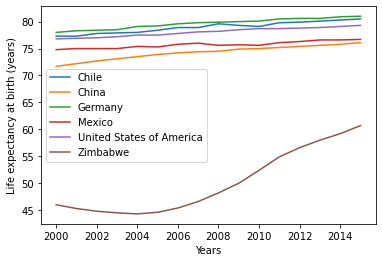

In [44]:
plt.figure()
for i in range(len(countries)):
    plt.plot(range(2000,2016), life_expectancy_evolution[i,:], label = countries[i])
plt.legend()
plt.xlabel('Years')
plt.ylabel('Life expectancy at birth (years)')